Text(0.5, 0, 'Deployment Type')

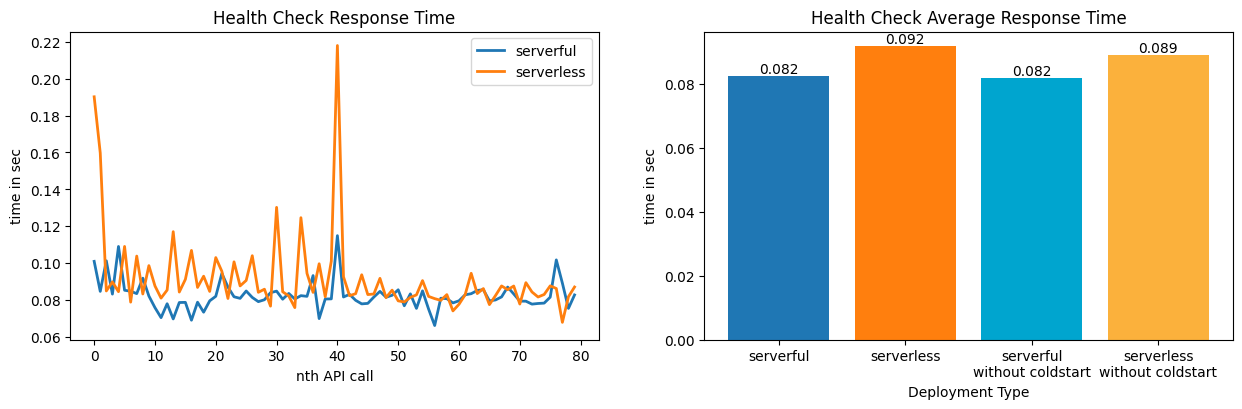

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def read_time_from_log(filepath):
    times = []
    with open(filepath) as f:
        for line in f.readlines():
            if line.startswith('          time_total'):
                time = line.split(':')[1].split()[0][:-1]
                times.append(float(time))
    return times
serverless = read_time_from_log('healthcheck.serverless.log')
serverful = read_time_from_log('healthcheck.serverful.log')
df = pd.DataFrame()
df['serverful'] = serverful
df['serverless'] = serverless

mean = df.mean().to_dict()
sum = df.sum().to_dict()
mean_without_coldstart = {}
mean_without_coldstart['serverful'] = (sum['serverful'] - serverful[0] -  serverful[40])/78
mean_without_coldstart['serverless'] = (sum['serverless'] - serverless[0] -  serverless[40])/78
fig, axs = plt.subplots(1,2, figsize=(15,4))

labels = ['serverful', 'serverless', 'serverful\nwithout coldstart', 'serverless\nwithout coldstart']
values = [mean['serverful'], mean['serverless'], mean_without_coldstart['serverful'], mean_without_coldstart['serverless']]

df.plot.line(ax=axs[0], linewidth=2)
axs[0].title.set_text('Health Check Response Time')
axs[0].set_xlabel('nth API call')
axs[0].set_ylabel('time in sec')

bar = plt.bar(labels, values, color=['C0', 'C1', '#00A5CF', '#FBB13C'])
axs[1].title.set_text("Health Check Average Response Time")
axs[1].bar_label(bar, fmt='%.3f')
axs[1].set_ylabel("time in sec")
axs[1].set_xlabel('Deployment Type')


Text(0.5, 0, 'Deployment Type')

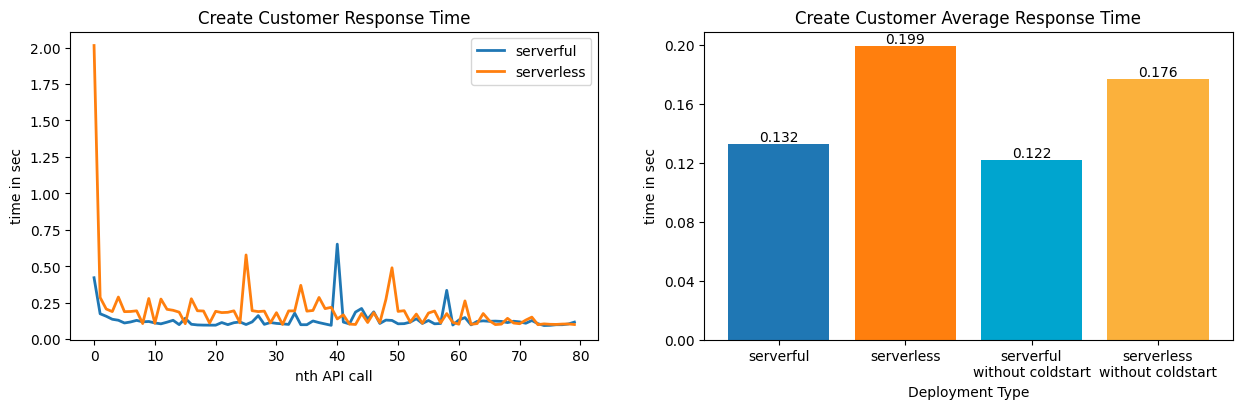

In [53]:
serverless = read_time_from_log('customer.serverless.log')
serverful = read_time_from_log('customer.serverful.log')
df = pd.DataFrame()
df['serverful'] = serverful
df['serverless'] = serverless

mean = df.mean().to_dict()
sum = df.sum().to_dict()
mean_without_coldstart = {}
mean_without_coldstart['serverful'] = (sum['serverful'] - serverful[0] -  serverful[40])/78
mean_without_coldstart['serverless'] = (sum['serverless'] - serverless[0] -  serverless[40])/78
fig, axs = plt.subplots(1,2, figsize=(15,4))

labels = ['serverful', 'serverless', 'serverful\nwithout coldstart', 'serverless\nwithout coldstart']
values = [mean['serverful'], mean['serverless'], mean_without_coldstart['serverful'], mean_without_coldstart['serverless']]

df.plot.line(ax=axs[0],linewidth=2)
axs[0].title.set_text('Create Customer Response Time')
axs[0].set_xlabel('nth API call')
axs[0].set_ylabel('time in sec')

bar = plt.bar(labels, values, color=['C0', 'C1', '#00A5CF', '#FBB13C'])
axs[1].title.set_text("Create Customer Average Response Time")
axs[1].bar_label(bar, fmt='%.3f')
axs[1].set_ylabel("time in sec")
# axs[1].yaxis.set_ticks(np.arange(0, 0.24, 0.04))
axs[1].set_xlabel('Deployment Type')


Text(0.5, 0, 'Deployment Type')

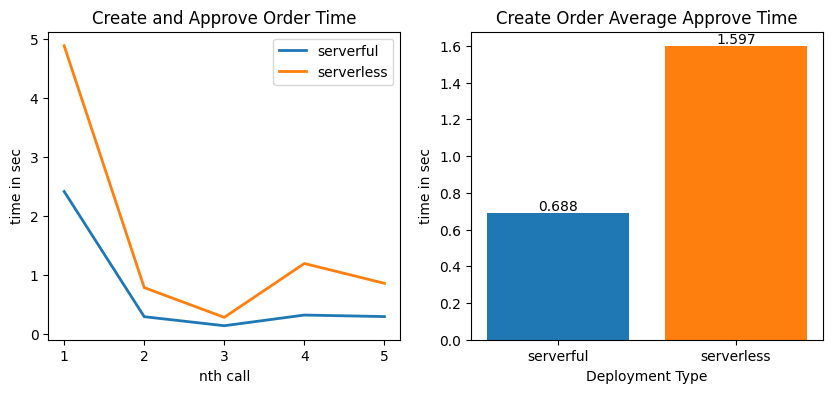

In [60]:
df_order= pd.read_csv('kafka.csv')
df_order.mean()
fig, axs = plt.subplots(1,2, figsize=(10,4))
df_order= pd.read_csv('kafka.csv')
df_order.index = [1,2,3,4,5]
values = df_order.mean().to_list()
df_order.plot.line(linewidth='2',ax=axs[0])
axs[0].xaxis.set_ticks(np.arange(1,6,1))
axs[0].set_title('Create and Approve Order Time')
axs[0].set_ylabel('time in sec')
axs[0].set_xlabel('nth call')
bar = plt.bar(['serverful', 'serverless'], values,color=['C0','C1'])
axs[1].title.set_text("Create Order Average Approve Time")
axs[1].bar_label(bar, fmt='%.3f')
axs[1].set_ylabel("time in sec")
# axs[1].yaxis.set_ticks(np.arange(0, 0.24, 0.04))
axs[1].set_xlabel('Deployment Type')